# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Get the total rides for each city type
total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [36]:
# Get the total drivers for each city type
total_drivers_type = city_data_df.groupby(['type']).sum()['driver_count']

In [5]:
# Get the total amount of fares for each city type
total_fare_type = pyber_data_df.groupby(['type']).sum()['fare']

In [6]:
# Get the average fare per ride for each city type. 
avg_fare_type = total_fare_type / total_rides_type

In [37]:
# Get the average fare per driver for each city type. 
avg_driver_fare_type = total_fare_type / total_drivers_type

In [8]:
# Create a PyBer summary DataFrame.
d = {"Total Rides" : total_rides_type, "Total Drivers" : total_drivers_type, "Total Fares" : total_fare_type,
     "Average Fare per Ride" : avg_fare_type, "Average Fare per Driver" : avg_driver_fare_type}

pyber_summary_df = pd.DataFrame(d)

In [9]:
# Cleanup df
pyber_summary_df.index.name = None

In [10]:
# Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Create df with Type, Date, and Fare
pyber_type_date_df = pd.DataFrame({"Type" : pyber_data_df["type"],
                                  "Date" : pyber_data_df['date'],
                                  "Fare" : pyber_data_df['fare']}
                                 )


In [38]:
# New df from groupbys to find the sum of fares for each day in each city type
pyber_td_fare_df = pd.DataFrame(pyber_type_date_df.groupby(["Type","Date"]).sum()["Fare"])

In [13]:
# Reset index
pyber_td_fare_df = pyber_td_fare_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
pyber_fare_pivot_df = pyber_td_fare_df.pivot(index = "Date", columns = "Type", values = "Fare")

In [15]:
# Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_fare_date_df = pyber_fare_pivot_df.loc['2019-01-01':'2019-04-29']

In [16]:
# Set the "date" index to datetime datatype
pyber_fare_date_df.index = pd.to_datetime(pyber_fare_date_df.index)

In [17]:
# Check that the datatype for the index is datetime
pyber_fare_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# Resample reindexed df with week sized bins applying sum() to find the total fares each week for each city type
pyber_week_sum_df = pd.DataFrame(pyber_fare_date_df.resample("W").sum())

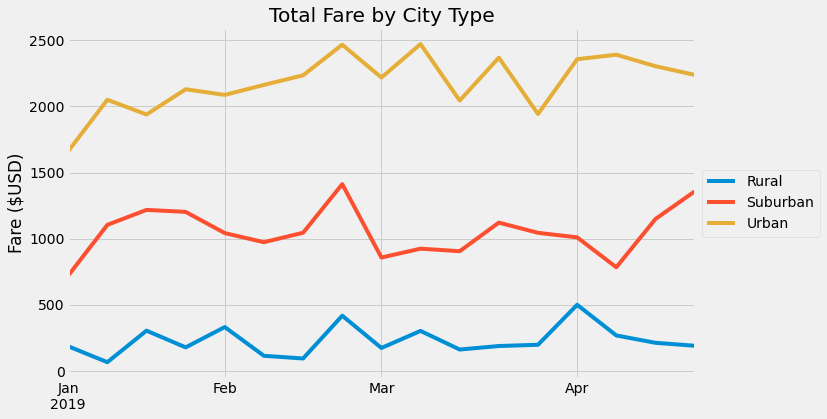

In [21]:
# Plot the resampled df

fig, ax = plt.subplots()

# Call .plot sub assigning the axis as ax
pyber_week_sum_df.plot(ax=ax)

# Create labels and titles
ax.set_xlabel("")
ax.set_ylabel("Fare ($USD)")
ax.set_title("Total Fare by City Type")

# Relocate legend outside fig
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))

# Enlarge fig based on inches
fig.set_size_inches(10,6)


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save fig using add. arg to save as it is displayed in the notebook
fig.savefig("analysis/PyBer_fare_summary.png", bbox_inches = "tight")


# Display plot
plt.show()
